In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/building_metadata.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/test.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv


In [2]:
root = "/kaggle/input/ashrae-energy-prediction/"
train_df = pd.read_csv(root + "train.csv")
test_df = pd.read_csv(root + "test.csv")
weather_train_df = pd.read_csv(root + "weather_train.csv")
building_meta = pd.read_csv(root + "building_metadata.csv")

In [3]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
weather_train_df.head()

In [ ]:
print("train df shape : ", train_df.shape)
print("wather df shape : ", weather_train_df.shape)

In [ ]:
building_meta.head()

In [4]:
target_weather=pd.merge(train_df,building_meta,on='building_id',how='left')
target_weather=target_weather.merge(weather_train_df,on=['site_id','timestamp'])

In [5]:
target_weather.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [ ]:
print("target_weather shape : ", target_weather.shape)

In [9]:
temp_meterReading = target_weather[['meter_reading', 'air_temperature', 'meter', 'site_id']]

In [58]:
temp_meterReading = temp_meterReading[temp_meterReading.meter_reading != 0]
print(temp_meterReading.shape)
meter_0 = temp_meterReading[temp_meterReading.meter == 0]
meter_1 = temp_meterReading[temp_meterReading.meter == 1]
meter_2 = temp_meterReading[temp_meterReading.meter == 2]
meter_3 = temp_meterReading[temp_meterReading.meter == 3]
meters = [meter_0, meter_1, meter_2, meter_3]
temp = []
for i in range(4):
    for j in range(16):
        globals()['meter_{}_site_{}'.format(i, j)] = meters[i][meters[i].site_id == j].groupby('air_temperature').mean()
        temp.append(globals()['meter_{}_site_{}'.format(i, j)])

(18257718, 4)


In [ ]:
for i in 

temp_mean_0 = meter_0.groupby('air_temperature').mean()
temp_mean_1 = meter_1.groupby('air_temperature').mean()
temp_mean_2 = meter_2.groupby('air_temperature').mean()
temp_mean_3 = meter_3.groupby('air_temperature').mean()

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

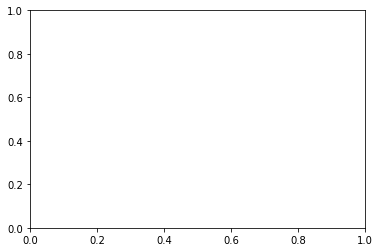

In [68]:
import matplotlib.pylab as plt

for idx, i in enumerate(temp):
    globals()['x_{}'.format(idx)] = i.index
    globals()['y_{}'.format(idx)] = i['meter_reading']
    plt.figure()
    plt.title(idx)
    plt.scatter(globals()['x_{}'.format(idx)],globals()['y_{}'.format(idx)])
    plt.show